## Problem Statement : Prepare a classification model using SVM for salary data 

## Data Description:

### age      -- age of a person
### workclass	-- A work class is a grouping of work 
### education	-- Education of an individuals	
### maritalstatus -- Marital status of an individulas	
### occupation	 -- occupation of an individuals
### relationship -- relationship of an individual to another	
### race --  Race of an Individual
### sex --  Gender of an Individual
### capitalgain --  profit received from the sale of an investment	
### capitalloss	-- A decrease in the value of a capital asset
### hoursperweek -- number of hours work per week	
### native -- Native of an individual
### Salary -- salary of an individual
-----

### Import Libraries 

In [1]:
# Necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Feature engineering Libraries
from sklearn.preprocessing  import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split

# Model Building Libraries
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import  accuracy_score, confusion_matrix, classification_report


#import WARNING
import warnings
warnings.filterwarnings('ignore')

### Import Data

In [2]:
salary_train = pd.read_csv('SalaryData_Train.csv')
salary_test = pd.read_csv('SalaryData_Test.csv')

In [3]:
salary_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
salary_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [5]:
salary_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
salary_train.tail()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
30160,52,Self-emp-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [7]:
salary_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [8]:
salary_test.tail()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K
15059,35,Self-emp-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,>50K


### Data Understanding

In [9]:
salary_train.shape

(30161, 14)

In [10]:
salary_test.shape

(15060, 14)

In [11]:
salary_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [12]:
salary_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [13]:
salary_train.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [14]:
salary_test.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [15]:
salary_train.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [16]:
salary_test.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [17]:
salary_train.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [18]:
salary_test.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [19]:
salary_train.nunique()

age               72
workclass          7
education         16
educationno       16
maritalstatus      7
occupation        14
relationship       6
race               5
sex                2
capitalgain      118
capitalloss       90
hoursperweek      94
native            40
Salary             2
dtype: int64

In [20]:
salary_test.nunique()

age               73
workclass          7
education         16
educationno       16
maritalstatus      7
occupation        14
relationship       6
race               5
sex                2
capitalgain      110
capitalloss       79
hoursperweek      89
native            40
Salary             2
dtype: int64

In [21]:
salary_train.count()

age              30161
workclass        30161
education        30161
educationno      30161
maritalstatus    30161
occupation       30161
relationship     30161
race             30161
sex              30161
capitalgain      30161
capitalloss      30161
hoursperweek     30161
native           30161
Salary           30161
dtype: int64

In [22]:
salary_test.count()

age              15060
workclass        15060
education        15060
educationno      15060
maritalstatus    15060
occupation       15060
relationship     15060
race             15060
sex              15060
capitalgain      15060
capitalloss      15060
hoursperweek     15060
native           15060
Salary           15060
dtype: int64

In [23]:
salary_train.duplicated().sum()

3258

In [24]:
salary_test.duplicated().sum()

930

In [25]:
salary_train = salary_train.drop_duplicates()

In [26]:
salary_train.duplicated().sum()

0

In [27]:
salary_test = salary_test.drop_duplicates()

In [28]:
salary_test.duplicated().sum()

0

In [29]:
salary_train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,26903.000000,26903.000000,26903.000000,26903.000000,26903.000000
mean,39.049140,10.144296,1215.443259,98.427499,41.164591
std,13.188825,2.620154,7805.366384,425.493211,12.347051
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,29.000000,9.000000,0.000000,0.000000,40.000000
50%,38.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [30]:
salary_test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,14130.000000,14130.000000,14130.000000,14130.000000,14130.000000
mean,39.155414,10.120736,1185.899292,94.499646,41.073885
std,13.429544,2.602557,7903.191981,417.955786,12.268036
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,29.000000,9.000000,0.000000,0.000000,40.000000
50%,38.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


### Data Visualization

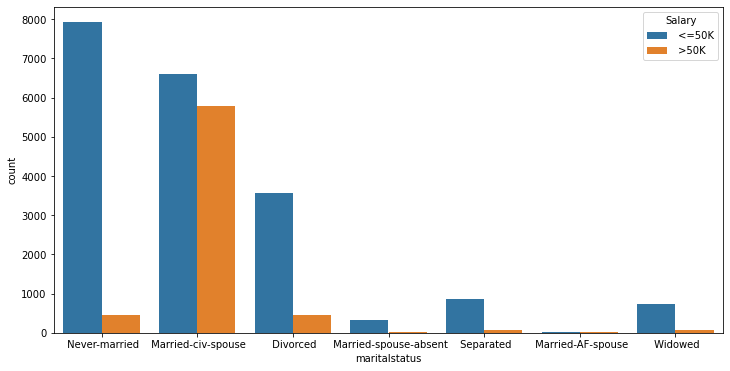

In [31]:
plt.figure(figsize=(12,6))
sns.countplot(salary_train['maritalstatus'],hue=salary_train['Salary'],)
plt.show()

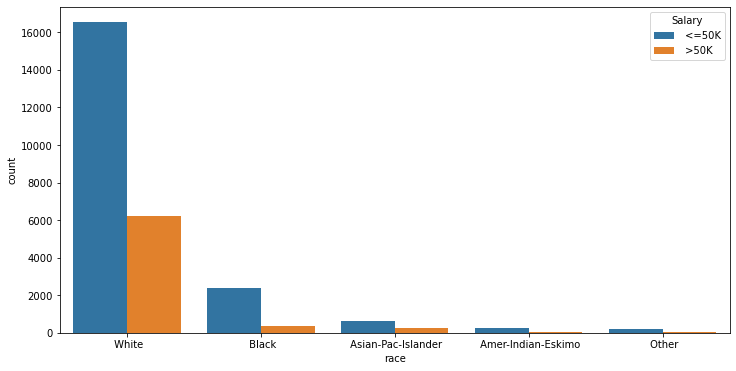

In [32]:
plt.figure(figsize=(12,6))
sns.countplot(salary_train['race'],hue=salary_train['Salary'],)
plt.show()

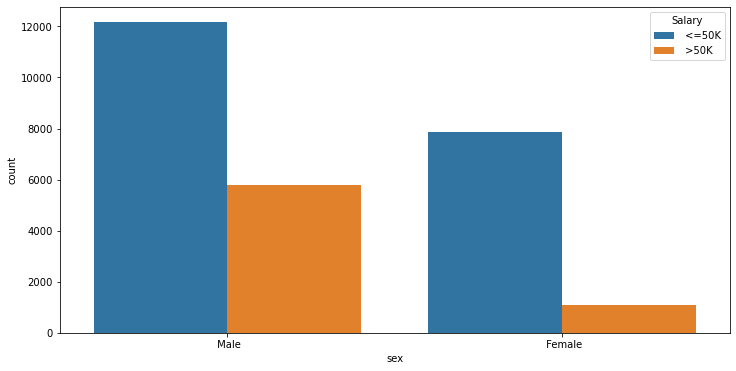

In [33]:
plt.figure(figsize=(12,6))
sns.countplot(salary_train['sex'],hue=salary_train['Salary'],)
plt.show()

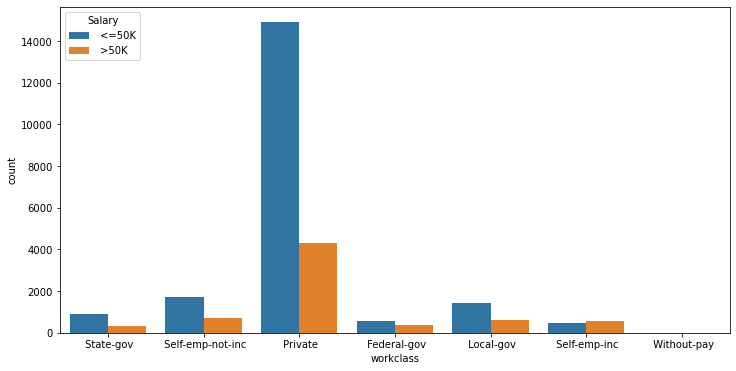

In [34]:
plt.figure(figsize=(12,6))
sns.countplot(salary_train['workclass'],hue=salary_train['Salary'],)
plt.show()

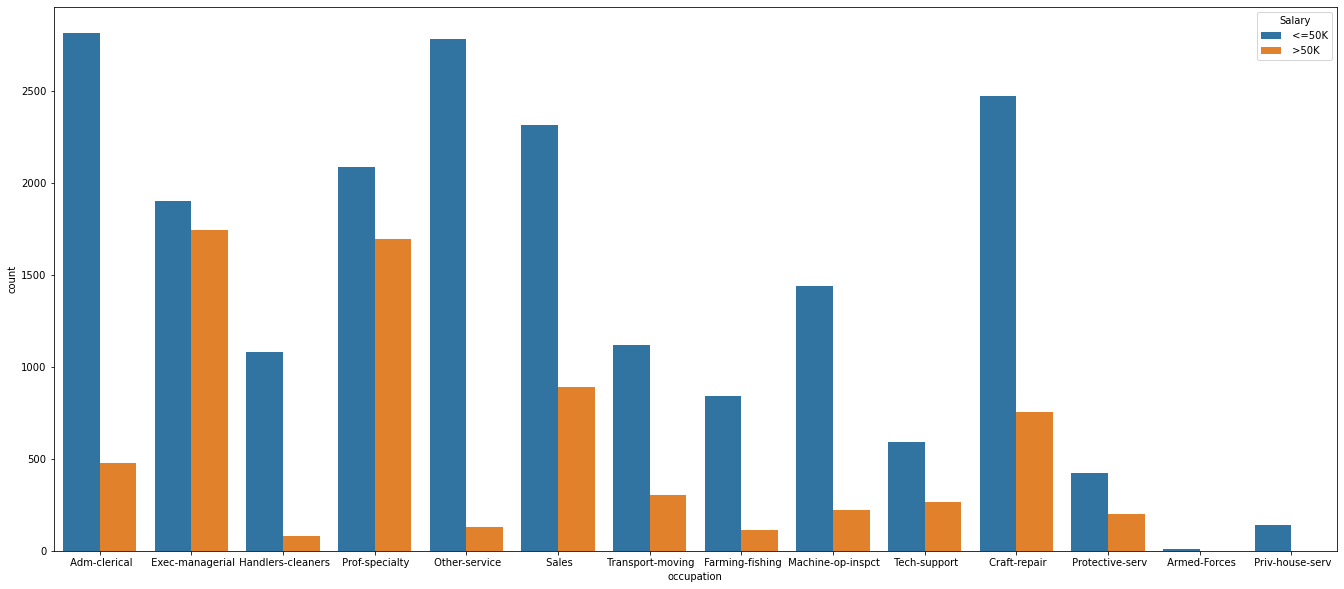

In [35]:
plt.figure(figsize=(23,10))
sns.countplot(salary_train['occupation'],hue=salary_train['Salary'],)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
plt.show()

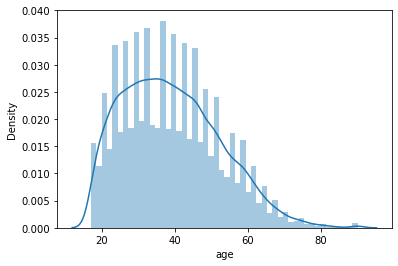

In [36]:
sns.distplot(salary_train['age'])
plt.show()

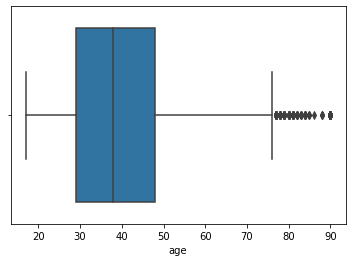

In [37]:
sns.boxplot(salary_train['age'])
plt.show()

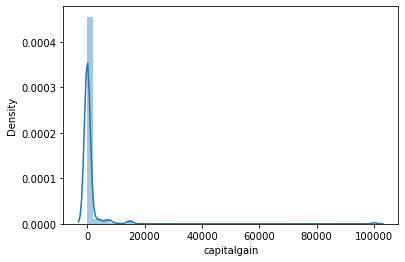

In [38]:
sns.distplot(salary_train['capitalgain'])
plt.show()

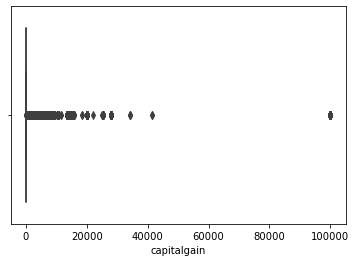

In [39]:
sns.boxplot(salary_train['capitalgain'])
plt.show()

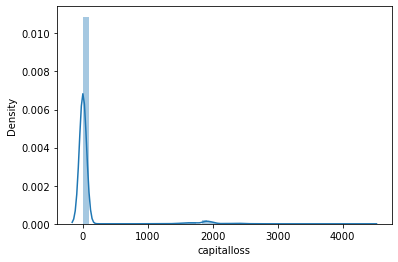

In [40]:
sns.distplot(salary_train['capitalloss'])
plt.show()

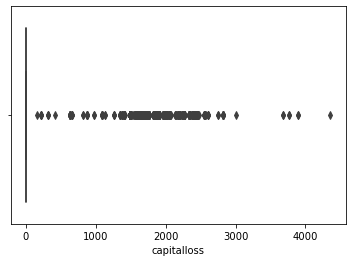

In [41]:
sns.boxplot(salary_train['capitalloss'])
plt.show()

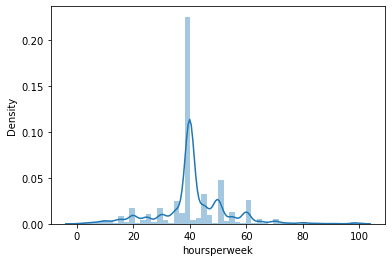

In [42]:
sns.distplot(salary_train['hoursperweek'])
plt.show()

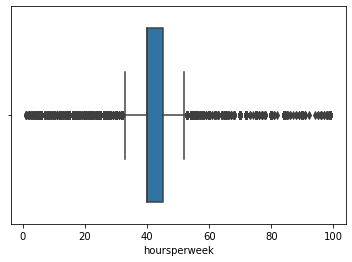

In [43]:
sns.boxplot(salary_train['hoursperweek'])
plt.show()

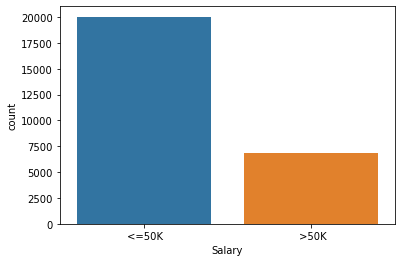

In [44]:
sns.countplot(salary_train['Salary'])
plt.show()

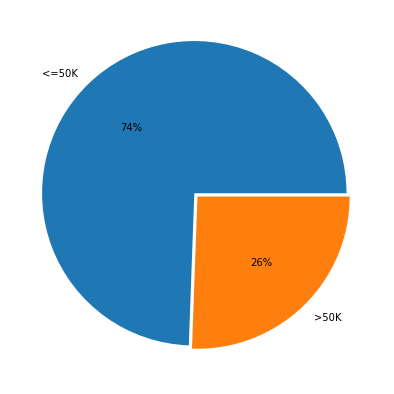

In [45]:
plt.figure(figsize=(8,7))
plt.pie(x = salary_train['Salary'].value_counts(),explode=[0.03,0], labels=['<=50K','>50K'],autopct='%1.0f%%')
plt.show()

### Data Manipulation

In [46]:
mapping = {' >50K': 1, ' <=50K': 0}

In [47]:
salary_train = salary_train.replace({'Salary': mapping})
salary_test = salary_test.replace({'Salary': mapping})

In [48]:
str_c = ["workclass","education","maritalstatus","occupation","relationship","race","sex","native"]

In [49]:
num = LabelEncoder()

In [50]:
for i in str_c:
    salary_train[i]= num.fit_transform(salary_train[i])
    salary_test[i]=num.fit_transform(salary_test[i])

In [51]:
salary_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0


In [52]:
salary_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0


In [53]:
salary_train.dtypes

age              int64
workclass        int32
education        int32
educationno      int64
maritalstatus    int32
occupation       int32
relationship     int32
race             int32
sex              int32
capitalgain      int64
capitalloss      int64
hoursperweek     int64
native           int32
Salary           int64
dtype: object

In [54]:
salary_test.dtypes

age              int64
workclass        int32
education        int32
educationno      int64
maritalstatus    int32
occupation       int32
relationship     int32
race             int32
sex              int32
capitalgain      int64
capitalloss      int64
hoursperweek     int64
native           int32
Salary           int64
dtype: object

### Finding Correlation

In [55]:
corr = salary_train.corr()

In [56]:
corr

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
age,1.000000,0.075184,0.002717,0.038048,-0.245062,-0.004570,-0.231111,0.040457,0.070434,0.077235,0.052684,0.072529,0.010626,0.223502
workclass,0.075184,1.000000,0.021289,0.037806,-0.031961,0.014047,-0.070996,0.051479,0.079380,0.033217,0.002739,0.047169,0.012683,0.016577
education,0.002717,0.021289,1.000000,0.359940,-0.040931,-0.025890,-0.010801,0.005572,-0.029841,0.034550,0.020469,0.058709,0.076605,0.090094
educationno,0.038048,0.037806,0.359940,1.000000,-0.066536,0.084300,-0.092236,0.035215,0.010941,0.126085,0.080025,0.145491,0.096279,0.332178
maritalstatus,-0.245062,-0.031961,-0.040931,-0.066536,1.000000,0.015094,0.155553,-0.073628,-0.108928,-0.042087,-0.033890,-0.175692,-0.029585,-0.184559
occupation,-0.004570,0.014047,-0.025890,0.084300,0.015094,1.000000,-0.063950,0.008183,0.066919,0.019724,0.010873,0.023073,0.003024,0.050711
relationship,-0.231111,-0.070996,-0.010801,-0.092236,0.155553,-0.063950,1.000000,-0.113708,-0.586804,-0.063322,-0.070351,-0.248745,-0.006126,-0.247438
race,0.040457,0.051479,0.005572,0.035215,-0.073628,0.008183,-0.113708,1.000000,0.085786,0.020049,0.032111,0.056460,0.118907,0.079109
sex,0.070434,0.079380,-0.029841,0.010941,-0.108928,0.066919,-0.586804,0.085786,1.000000,0.053490,0.053084,0.228767,-0.004930,0.217360
capitalgain,0.077235,0.033217,0.034550,0.126085,-0.042087,0.019724,-0.063322,0.020049,0.053490,1.000000,-0.036023,0.079403,0.012902,0.228865


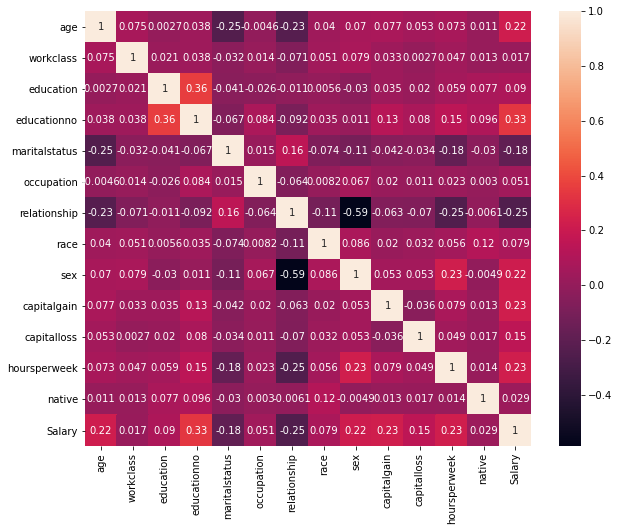

In [57]:
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True)
plt.show()

Skew: -0.3485160231869204
Kurtosis: 0.5549513835292905


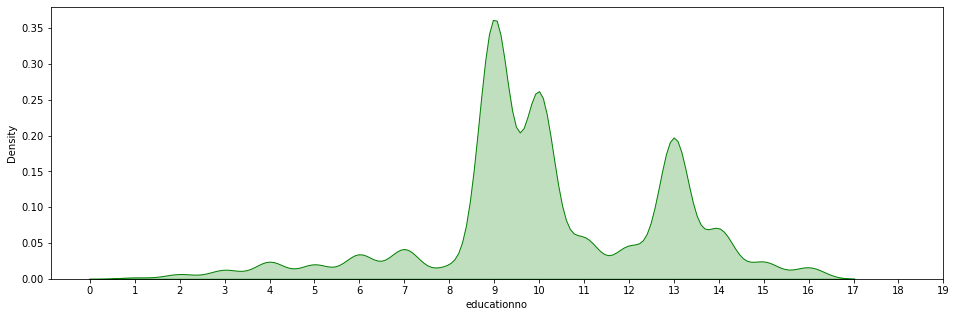

In [58]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(salary_train['educationno'].skew()))
print("Kurtosis: {}".format(salary_train['educationno'].kurtosis()))
ax = sns.kdeplot(salary_train['educationno'],shade=True,color='g')
plt.xticks([i for i in range(0,20,1)])
plt.show()

### The data is negatively skewed and has low kurtosis 
---
### Most of the people have 'educationno' of years of education  = 9 to 10 years.
---

### EDA 

In [59]:
salary_train.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [60]:
features = ['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary']

In [61]:
for feature in features:
    unique_features = salary_train[feature].unique()
    num_features = salary_train[feature].nunique()
    
    if num_features <= 10:
        print('{} has {} values as {}'.format(feature, num_features, unique_features))
    else:
        print('{} has {} values as {}......'.format(feature, num_features, unique_features[0:10]))

age has 72 values as [39 50 38 53 28 37 49 52 31 42]......
workclass has 7 values as [5 4 2 0 1 3 6]
education has 16 values as [ 9 11  1 12  6 15  7  5 10  8]......
educationno has 16 values as [13  9  7 14  5 10 12  4 16 11]......
maritalstatus has 7 values as [4 2 0 3 5 1 6]
occupation has 14 values as [ 0  3  5  9  7 11 13  4  6 12]......
relationship has 6 values as [1 0 5 3 4 2]
race has 5 values as [4 2 1 0 3]
sex has 2 values as [1 0]
capitalgain has 118 values as [ 2174     0 14084  5178  5013  2407 14344 15024  7688  4064]......
capitalloss has 90 values as [   0 2042 1408 1902 1887 1719 1762 1564 2179 1816]......
hoursperweek has 94 values as [40 13 16 45 50 80 30 35 60 20]......
native has 40 values as [37  4 21 17 24 31 14  8  1 10]......
Salary has 2 values as [0 1]


In [62]:
salary_train['education'].unique()

array([ 9, 11,  1, 12,  6, 15,  7,  5, 10,  8, 14,  4,  0, 13,  2,  3])

In [63]:
salary_train['educationno'].unique()

array([13,  9,  7, 14,  5, 10, 12,  4, 16, 11, 15,  3,  6,  1,  8,  2],
      dtype=int64)

In [64]:
salary_test['education'].unique()

array([ 1, 11,  7, 15,  0, 14,  5,  9, 12,  4,  8,  6, 10,  2,  3, 13])

In [65]:
salary_test['educationno'].unique()

array([ 7,  9, 12, 10,  6, 15,  4, 13, 14,  3, 11,  5, 16,  8,  2,  1],
      dtype=int64)

### Droping Education Column from both train and test data

In [66]:
salary_train= salary_train.drop('education', axis=1)
salary_test = salary_test.drop('education', axis=1)

In [67]:
salary_train.columns

Index(['age', 'workclass', 'educationno', 'maritalstatus', 'occupation',
       'relationship', 'race', 'sex', 'capitalgain', 'capitalloss',
       'hoursperweek', 'native', 'Salary'],
      dtype='object')

### Model Building

In [68]:
#Split Data
X = salary_train.drop(['Salary'], axis=1)
y = salary_train[['Salary']]

In [69]:
X.head()

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,13,4,0,1,4,1,2174,0,40,37
1,50,4,13,2,3,0,4,1,0,0,13,37
2,38,2,9,0,5,1,4,1,0,0,40,37
3,53,2,7,2,5,0,2,1,0,0,40,37
4,28,2,13,2,9,5,2,0,0,0,40,4


In [70]:
y.head()

,Salary
0,0
1,0
2,0
3,0
4,0


In [71]:
X.shape

(26903, 12)

In [72]:
y.shape

(26903, 1)

In [73]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=12121,stratify=y)

In [74]:
X_train.shape,y_train.shape 

((21522, 12), (21522, 1))

In [75]:
X_test.shape,y_test.shape

((5381, 12), (5381, 1))

### RBF Kernel
---
### Model Training

In [76]:
%%time
model_rbf = SVC(kernel = "rbf",C=1,gamma=0.1)
model_rbf.fit(X_train,y_train)

Wall time: 1min 48s


SVC(C=1, gamma=0.1)

### Model Testing & Model Evaluation 
### Train Data

In [77]:
y_pred_rbf_train = model_rbf.predict(X_train)

In [78]:
acc_train= accuracy_score(y_train, y_pred_rbf_train)
print('Accuracy :', round(acc_train,2))
print('Confusion Matrix : \n',confusion_matrix(y_train, y_pred_rbf_train))
print('Classification Report : \n', classification_report(y_train, y_pred_rbf_train))

Accuracy : 0.92
Confusion Matrix : 
 [[15554   464]
 [ 1351  4153]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.92      0.97      0.94     16018
           1       0.90      0.75      0.82      5504

    accuracy                           0.92     21522
   macro avg       0.91      0.86      0.88     21522
weighted avg       0.91      0.92      0.91     21522



### Test Data

In [79]:
y_pred_rbf_test = model_rbf.predict(X_test)

In [80]:
acc_test= accuracy_score(y_test, y_pred_rbf_test)
print('Accuracy :', round(acc_test,2))
print('Confusion Matrix : \n',confusion_matrix(y_test, y_pred_rbf_test))
print('Classification Report : \n', classification_report(y_test, y_pred_rbf_test))

Accuracy : 0.8
Confusion Matrix : 
 [[3776  229]
 [ 853  523]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.82      0.94      0.87      4005
           1       0.70      0.38      0.49      1376

    accuracy                           0.80      5381
   macro avg       0.76      0.66      0.68      5381
weighted avg       0.78      0.80      0.78      5381



### Sigmoid Kernel
### Model Training

In [81]:
%%time
model_sigmoid = SVC(kernel = "sigmoid")
model_sigmoid.fit(X_train,y_train)

Wall time: 16.8 s


SVC(kernel='sigmoid')

### Model Testing & Model Evaluation
----
### Train Data

In [82]:
y_pred_sig_train = model_sigmoid.predict(X_train)

In [83]:
acc_train= accuracy_score(y_train, y_pred_sig_train)
print('Accuracy :', round(acc_train,2))
print('Confusion Matrix : \n',confusion_matrix(y_train, y_pred_sig_train))
print('Classification Report : \n', classification_report(y_train, y_pred_sig_train))

Accuracy : 0.75
Confusion Matrix : 
 [[14732  1286]
 [ 4111  1393]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.78      0.92      0.85     16018
           1       0.52      0.25      0.34      5504

    accuracy                           0.75     21522
   macro avg       0.65      0.59      0.59     21522
weighted avg       0.71      0.75      0.72     21522



### Test Data

In [84]:
y_pred_sig_test = model_sigmoid.predict(X_test)

In [85]:
acc_test= accuracy_score(y_test, y_pred_sig_test)
print('Accuracy :', round(acc_test,2))
print('Confusion Matrix : \n',confusion_matrix(y_test, y_pred_sig_test))
print('Classification Report : \n', classification_report(y_test, y_pred_sig_test))

Accuracy : 0.75
Confusion Matrix : 
 [[3709  296]
 [1027  349]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.78      0.93      0.85      4005
           1       0.54      0.25      0.35      1376

    accuracy                           0.75      5381
   macro avg       0.66      0.59      0.60      5381
weighted avg       0.72      0.75      0.72      5381



### Poly Kernel
### Model Training

In [86]:
%%time
model_poly = SVC(kernel = "poly")
model_poly.fit(X_train,y_train)

Wall time: 13.5 s


SVC(kernel='poly')

### Model Testing & Model Evaluation 
### Train Data

In [87]:
y_pred_train = model_poly.predict(X_train)

In [88]:
acc_train= accuracy_score(y_train, y_pred_train)
print('Accuracy :', round(acc_train,2))
print('Confusion Matrix : \n',confusion_matrix(y_train, y_pred_train))
print('Classification Report : \n', classification_report(y_train, y_pred_train))

Accuracy : 0.77
Confusion Matrix : 
 [[16009     9]
 [ 4867   637]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.77      1.00      0.87     16018
           1       0.99      0.12      0.21      5504

    accuracy                           0.77     21522
   macro avg       0.88      0.56      0.54     21522
weighted avg       0.82      0.77      0.70     21522



### Test Data

In [89]:
y_pred_test = model_poly.predict(X_test)

In [90]:
acc_test= accuracy_score(y_test, y_pred_test)
print('Accuracy :', round(acc_test,2))
print('Confusion Matrix : \n',confusion_matrix(y_test, y_pred_test))
print('Classification Report : \n', classification_report(y_test, y_pred_test))

Accuracy : 0.77
Confusion Matrix : 
 [[4002    3]
 [1228  148]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.77      1.00      0.87      4005
           1       0.98      0.11      0.19      1376

    accuracy                           0.77      5381
   macro avg       0.87      0.55      0.53      5381
weighted avg       0.82      0.77      0.69      5381



### Conclusion : RBF Model gives the best accuracy of 80%

### The Salary Data is classified by 80% accuracy with RBF kernel.